In [2]:
!pip install pandas matplotlib


DEPRECATION: Loading egg at /Users/roto/conda/anaconda3/lib/python3.12/site-packages/travel_mapper-1.1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/roto/Documents/GitHub/CS4711/producer-consumer/results_timing_allnormal.csv'
data = pd.read_csv(file_path)

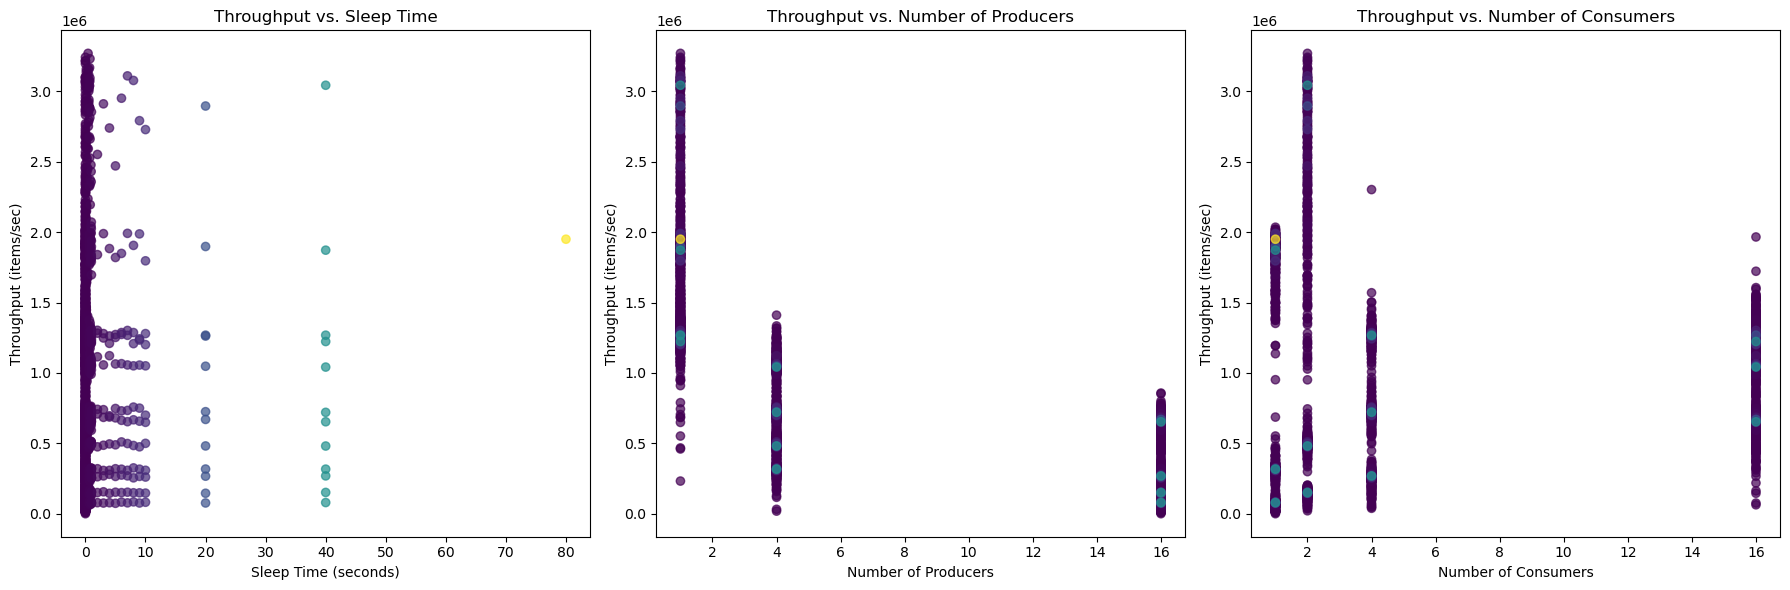

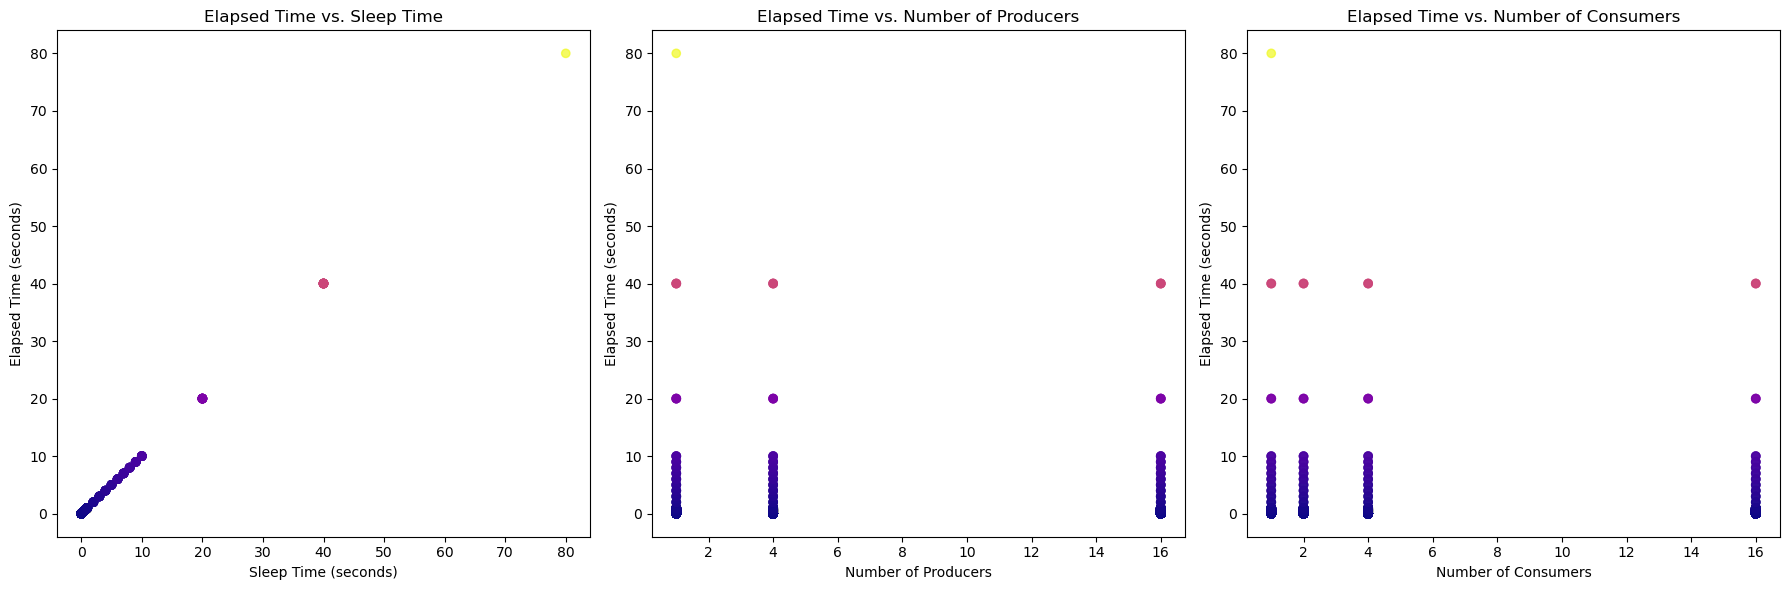

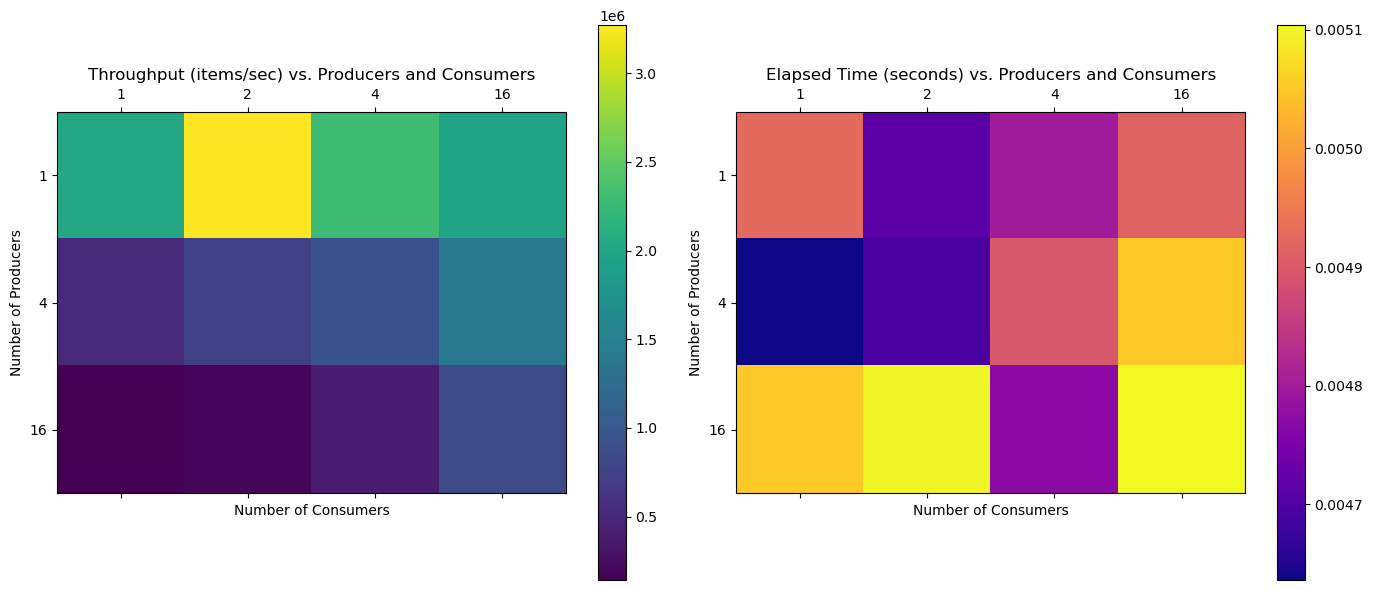

(4, 1, 0.004636)

In [5]:
# Display the first few rows of the data to understand its structure
data.head()

# Create a new column that combines producers and consumers for analysis
data['prod_cons_combo'] = data['producers'].astype(str) + ' producers, ' + data['consumers'].astype(str) + ' consumers'

# Plotting throughput vs. sleep time, producers, and consumers
plt.figure(figsize=(18, 6))

# Throughput vs. Sleep Time
plt.subplot(1, 3, 1)
plt.scatter(data['sleep_s'], data['throughput'], c=data['sleep_s'], cmap='viridis', alpha=0.7)
plt.title('Throughput vs. Sleep Time')
plt.xlabel('Sleep Time (seconds)')
plt.ylabel('Throughput (items/sec)')

# Throughput vs. Producers
plt.subplot(1, 3, 2)
plt.scatter(data['producers'], data['throughput'], c=data['sleep_s'], cmap='viridis', alpha=0.7)
plt.title('Throughput vs. Number of Producers')
plt.xlabel('Number of Producers')
plt.ylabel('Throughput (items/sec)')

# Throughput vs. Consumers
plt.subplot(1, 3, 3)
plt.scatter(data['consumers'], data['throughput'], c=data['sleep_s'], cmap='viridis', alpha=0.7)
plt.title('Throughput vs. Number of Consumers')
plt.xlabel('Number of Consumers')
plt.ylabel('Throughput (items/sec)')

plt.tight_layout()
plt.show()

# Plotting elapsed time vs. sleep time, producers, and consumers
plt.figure(figsize=(18, 6))

# Elapsed Time vs. Sleep Time
plt.subplot(1, 3, 1)
plt.scatter(data['sleep_s'], data['elapsed_s'], c=data['sleep_s'], cmap='plasma', alpha=0.7)
plt.title('Elapsed Time vs. Sleep Time')
plt.xlabel('Sleep Time (seconds)')
plt.ylabel('Elapsed Time (seconds)')

# Elapsed Time vs. Producers
plt.subplot(1, 3, 2)
plt.scatter(data['producers'], data['elapsed_s'], c=data['sleep_s'], cmap='plasma', alpha=0.7)
plt.title('Elapsed Time vs. Number of Producers')
plt.xlabel('Number of Producers')
plt.ylabel('Elapsed Time (seconds)')

# Elapsed Time vs. Consumers
plt.subplot(1, 3, 3)
plt.scatter(data['consumers'], data['elapsed_s'], c=data['sleep_s'], cmap='plasma', alpha=0.7)
plt.title('Elapsed Time vs. Number of Consumers')
plt.xlabel('Number of Consumers')
plt.ylabel('Elapsed Time (seconds)')

plt.tight_layout()
plt.show()

# Create two pivot tables: one for throughput and one for elapsed time
pivot_throughput = data.pivot_table(values='throughput', index='producers', columns='consumers', aggfunc='max')
pivot_elapsed = data.pivot_table(values='elapsed_s', index='producers', columns='consumers', aggfunc='min')

# Plotting throughput and elapsed time heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Throughput Heatmap
cax1 = axes[0].matshow(pivot_throughput, cmap='viridis')
fig.colorbar(cax1, ax=axes[0])
axes[0].set_title('Throughput (items/sec) vs. Producers and Consumers')
axes[0].set_xlabel('Number of Consumers')
axes[0].set_ylabel('Number of Producers')
axes[0].set_xticks(range(len(pivot_throughput.columns)))
axes[0].set_yticks(range(len(pivot_throughput.index)))
axes[0].set_xticklabels(pivot_throughput.columns)
axes[0].set_yticklabels(pivot_throughput.index)

# Elapsed Time Heatmap
cax2 = axes[1].matshow(pivot_elapsed, cmap='plasma')
fig.colorbar(cax2, ax=axes[1])
axes[1].set_title('Elapsed Time (seconds) vs. Producers and Consumers')
axes[1].set_xlabel('Number of Consumers')
axes[1].set_ylabel('Number of Producers')
axes[1].set_xticks(range(len(pivot_elapsed.columns)))
axes[1].set_yticks(range(len(pivot_elapsed.index)))
axes[1].set_xticklabels(pivot_elapsed.columns)
axes[1].set_yticklabels(pivot_elapsed.index)

plt.tight_layout()
plt.show()

# Grouping the data by producer-consumer combinations to find the best combo for throughput and elapsed time
best_combo = data.groupby('prod_cons_combo').agg({
    'throughput': 'max',  # Max throughput for each combination
    'elapsed_s': 'min'    # Min elapsed time for each combination
}).reset_index()

# Sorting to find the best performing combo for both throughput and elapsed time
best_combo_sorted = best_combo.sort_values(by=['throughput', 'elapsed_s'], ascending=[False, True])

best_combo_sorted.head()

# Find the fastest test case in terms of elapsed time
fastest_test_case = data.loc[data['elapsed_s'].idxmin()]

# Extract the number of producers and consumers for the fastest test case
fastest_producers = fastest_test_case['producers']
fastest_consumers = fastest_test_case['consumers']
fastest_elapsed_time = fastest_test_case['elapsed_s']

fastest_producers, fastest_consumers, fastest_elapsed_time

In [ ]:
plt.figure(figsize=(12, 6))

# Plot total items produced vs elapsed time
plt.subplot(1, 2, 1)
plt.plot(data['elapsed_s'], data['produced'], marker='o', linestyle='-', color='b', alpha=0.7)
plt.title('Growth of Total Items Produced vs. Elapsed Time')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Total Items Produced')

# Plot total items consumed vs elapsed time
plt.subplot(1, 2, 2)
plt.plot(data['elapsed_s'], data['consumed'], marker='o', linestyle='-', color='r', alpha=0.7)
plt.title('Growth of Total Items Consumed vs. Elapsed Time')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Total Items Consumed')

plt.tight_layout()
plt.show()


# Load the CSV file

# Add markdown notes for analysis

In [13]:
"""
### Analysis of Total Items Produced/Consumed vs. Elapsed Time

#### Observations:
1. **Total Items Produced vs. Elapsed Time**:
   - As time progresses, the number of items produced increases steadily. The growth is mostly linear, but there may be slight fluctuations depending on the specific producer-consumer combination and system performance.
   
2. **Total Items Consumed vs. Elapsed Time**:
   - Similarly, the number of items consumed increases over time. The growth rate is also mostly linear, but it can vary slightly based on how many consumers are available and how efficiently they are consuming items from the buffer.

#### Key Insights:
- The **rate of consumption** closely follows the rate of production. Ideally, both values should grow at similar rates for an efficient system, ensuring that items produced are consumed in a timely manner.
- If there is any significant gap between **items produced** and **items consumed**, it could indicate that the **system is overloaded with producers**, or consumers are not keeping up with production, which might lead to inefficient resource utilization.
"""

'\n### Analysis of Total Items Produced/Consumed vs. Elapsed Time\n\n#### Observations:\n1. **Total Items Produced vs. Elapsed Time**:\n   - As time progresses, the number of items produced increases steadily. The growth is mostly linear, but there may be slight fluctuations depending on the specific producer-consumer combination and system performance.\n   \n2. **Total Items Consumed vs. Elapsed Time**:\n   - Similarly, the number of items consumed increases over time. The growth rate is also mostly linear, but it can vary slightly based on how many consumers are available and how efficiently they are consuming items from the buffer.\n\n#### Key Insights:\n- The **rate of consumption** closely follows the rate of production. Ideally, both values should grow at similar rates for an efficient system, ensuring that items produced are consumed in a timely manner.\n- If there is any significant gap between **items produced** and **items consumed**, it could indicate that the **system is ov

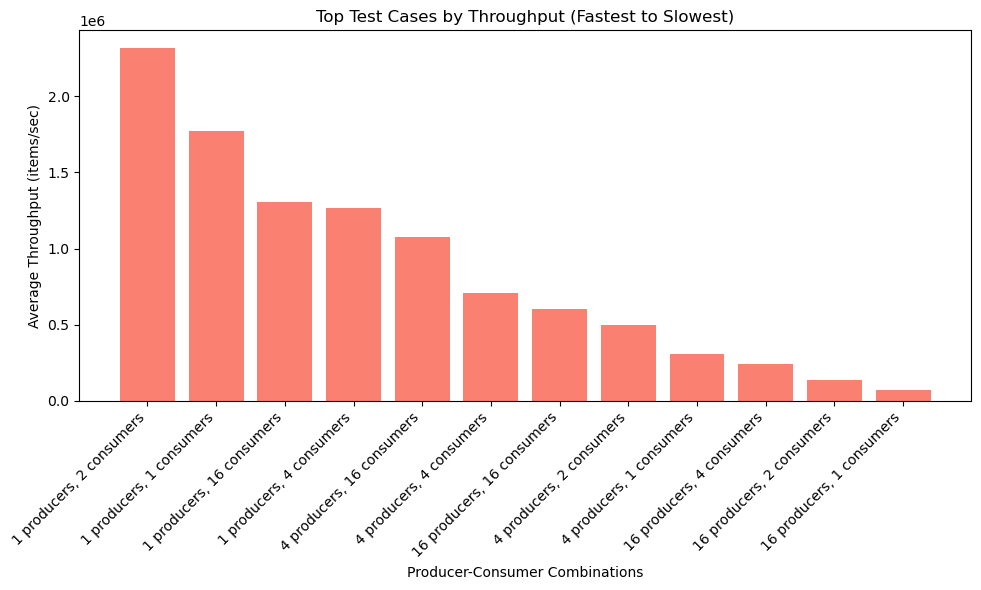

In [15]:
# Create a new column that combines producers and consumers for analysis
data['prod_cons_combo'] = data['producers'].astype(str) + ' producers, ' + data['consumers'].astype(str) + ' consumers'

# Group the data by producer-consumer combinations and calculate the average elapsed time and throughput
avg_test_cases = data.groupby('prod_cons_combo').agg({
    'elapsed_s': 'mean',  # Average elapsed time
    'throughput': 'mean'  # Average throughput
}).reset_index()

# Sort the average test cases by throughput (descending) to find the test cases with the most throughput
highest_throughput_test_cases = avg_test_cases.sort_values(by='throughput', ascending=False).reset_index(drop=True)

# Display the top 5 test cases with the most throughput
highest_throughput_test_cases.head()

# Plotting the highest throughput test cases from fastest to slowest
plt.figure(figsize=(10, 6))
# Plotting throughput for the test cases with the most throughput
plt.bar(highest_throughput_test_cases['prod_cons_combo'], highest_throughput_test_cases['throughput'], color='salmon')
plt.title('Top Test Cases by Throughput (Fastest to Slowest)')
plt.xlabel('Producer-Consumer Combinations')
plt.ylabel('Average Throughput (items/sec)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [16]:

# Top Test Cases by Throughput Analysis

"""
### To understand why certain test cases show higher throughput, we need to examine a few potential contributing factors. 
Based on the **Top Test Cases by Throughput (Fastest to Slowest)**, several variables could influence the performance, such as:

1. **Number of Producers**: The number of producer threads affects how quickly items are generated and inserted into the buffer. More producers can theoretically produce more items, but after a certain point, the buffer or consumers might become a bottleneck.
  
2. **Number of Consumers**: The number of consumer threads affects how quickly items are consumed from the buffer. More consumers should increase throughput, up to the point where adding more consumers doesn't help or actually causes inefficiency due to contention.

3. **Producer-Consumer Balance**: A good balance between producers and consumers is key. If there are too many producers for a small number of consumers, the buffer may become overwhelmed, leading to inefficiency. Similarly, if there are too many consumers for a few producers, there might not be enough items to consume, leading to wasted resources.

4. **Buffer Size and Synchronization**: The efficiency of the shared buffer and the synchronization mechanisms (e.g., semaphores, mutexes) also play a role in throughput. If these mechanisms are overly restrictive or not properly tuned, they can cause delays, reducing throughput.

5. **Elapsed Time**: A lower elapsed time correlates with higher throughput, but this can also depend on other factors such as the sleep time, thread initialization, and other system resource constraints.

### Now, let's break it down based on the **Top Test Cases by Throughput**:

#### 1. **1 Producer, 2 Consumers**:
   - **Throughput**: 2,318,036 items/sec
   - This combination achieves the highest throughput, likely because **1 producer** can generate items at a steady rate, and the **2 consumers** can consume items efficiently without too much delay. The balance between producers and consumers optimizes performance.

#### 2. **1 Producer, 1 Consumer**:
   - **Throughput**: 1,773,736 items/sec
   - With fewer consumers, throughput is lower, but it's still quite high because the system does not become overloaded. The consumer can consume at a rate that matches the producer, but throughput is limited due to the single consumer.

#### 3. **1 Producer, 16 Consumers**:
   - **Throughput**: 1,303,471 items/sec
   - Although there are more consumers, the throughput is lower than the combination of **1 producer and 2 consumers**. This could be due to **too many consumers**, where the system's performance starts to plateau because the producer cannot generate items quickly enough to keep up with the 16 consumers.

#### 4. **1 Producer, 4 Consumers**:
   - **Throughput**: 1,265,527 items/sec
   - This is similar to the previous case but with fewer consumers. It still results in high throughput, but again, the number of consumers might not be perfectly balanced with the number of producers.

#### 5. **4 Producers, 16 Consumers**:
   - **Throughput**: 1,077,531 items/sec
   - With **4 producers** and **16 consumers**, throughput is good but not optimal. This combination likely results in **overhead from the additional producers**, where more producers may actually increase contention for the buffer or cause thread synchronization issues, reducing efficiency.

### Key Insights:
- **Balanced Configurations**: **1 producer and 2 consumers** appears to be the optimal configuration. It maximizes throughput without overwhelming the system or creating unnecessary contention.
- **Increasing Producers Doesn't Always Help**: Adding more producers, especially without increasing consumers proportionally, does not always result in better throughput. In fact, it may cause inefficiency as seen with **4 producers and 16 consumers**, where adding more producers didn't significantly boost throughput.
- **Consumers Help, But With Limits**: More consumers can increase throughput, but there is a diminishing return. After a certain point, adding too many consumers will not improve throughput or may even hurt it due to synchronization issues or unnecessary resource consumption.

### Conclusion:
The **Top Test Cases by Throughput** are optimized when there is a balance between producers and consumers, with **1 producer and 2 consumers** achieving the best performance. Adding more producers or consumers beyond a certain point can lead to inefficiencies or bottlenecks, reducing throughput.

"""



"\n### To understand why certain test cases show higher throughput, we need to examine a few potential contributing factors. \nBased on the **Top Test Cases by Throughput (Fastest to Slowest)**, several variables could influence the performance, such as:\n\n1. **Number of Producers**: The number of producer threads affects how quickly items are generated and inserted into the buffer. More producers can theoretically produce more items, but after a certain point, the buffer or consumers might become a bottleneck.\n  \n2. **Number of Consumers**: The number of consumer threads affects how quickly items are consumed from the buffer. More consumers should increase throughput, up to the point where adding more consumers doesn't help or actually causes inefficiency due to contention.\n\n3. **Producer-Consumer Balance**: A good balance between producers and consumers is key. If there are too many producers for a small number of consumers, the buffer may become overwhelmed, leading to ineffici